# <font color=white>06. Regressão Linear Simples</font>
---

<img src="https://selecao.letscode.com.br/favicon.png" width="40px" style="position: absolute; top: 15px; right: 20px; border-radius: 5px;" />

## Roteiro da Aula

1. Correlação vs Regressão Linear
2. Regressão Linear: Conceitos Iniciais
3. Entendendo a regressão linear na prática
4. Como encontrar a reta de regressão ideal? (Minimizando o erro)
5. Exemplo prático: Peso e Altura  
    - Conhecendo as bibliotecas: `sklearn` e `statsmodels`  
    - Modelo com a presença de outliers  
6. Características do Erro
7. Métricas para Análise dos Erros

---

## 1. Correlação vs Regressão Linear

| Correlação | Regressão |
|:----------:|:---------:|
| Mede o grau de relação entre duas variáveis | Uma variável afeta a outra |
| Grau de interelação | Baseada em causalidade (~Relação~ → Causa e efeito) |
| $\rho(x,y)$ = $\rho(y,x)$ | Unidirecional |
| Único ponto | Linha |

### $\Rightarrow$ Correlação não implica em causalidade!


> [Link para os slides](https://docs.google.com/presentation/d/1zs6WbS1VQDykVvi3rduVnlG_NTlH9V3Q/edit?usp=sharing&ouid=100697162582615560133&rtpof=true&sd=true)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # Serve para setar o tema do Matplotlib para ser o mesmo do Seaborn

## 2. Regressão Linear: Conceitos iniciais

Vejamos a importância da escolha do coeficiente ideal na prática...

In [2]:
x = np.arange(6)

In [3]:
x

array([0, 1, 2, 3, 4, 5])

In [4]:
y = x

In [10]:
# beta_0 = 0
# beta_1 = 1

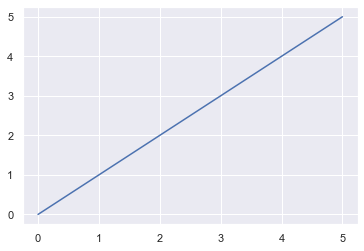

In [11]:
plt.plot(x, y)

### Equação da reta de regressão

$$
y = \beta_1x + \beta_0
$$

- $\beta_1$: coeficiente que multiplica a variável independente
- $\beta_0$: intercepto

In [12]:
# Coeficiente x EQM
coef_erro = []

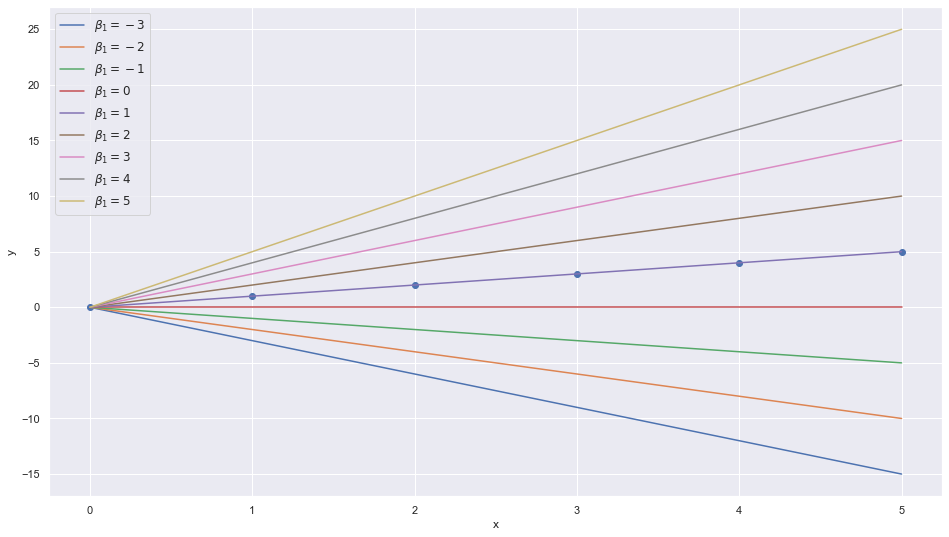

In [13]:
coef_erro = []
b0 = 0

plt.figure(figsize=(16,9))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

for b1 in range(-3, 6):
    y_est = x * b1 + b0
    
    plt.plot(x, y_est, label=f'$\\beta_1 = {b1}$')
    
    SQE = sum((y - y_est)**2) # Soma dos quadrados dos erros/resíduos
    EQM = SQE / len(y)
    
    coef_erro.append([b1, EQM])
    
plt.legend(fontsize=12)

No nosso caso, $y = x$, então, $\beta_0 = 0$, $\beta_1 = 1$.

In [14]:
coef_erro

[[-3, 146.66666666666666],
 [-2, 82.5],
 [-1, 36.666666666666664],
 [0, 9.166666666666666],
 [1, 0.0],
 [2, 9.166666666666666],
 [3, 36.666666666666664],
 [4, 82.5],
 [5, 146.66666666666666]]

In [15]:
coef_eqm = np.array(coef_erro)
coef_eqm

array([[ -3.        , 146.66666667],
       [ -2.        ,  82.5       ],
       [ -1.        ,  36.66666667],
       [  0.        ,   9.16666667],
       [  1.        ,   0.        ],
       [  2.        ,   9.16666667],
       [  3.        ,  36.66666667],
       [  4.        ,  82.5       ],
       [  5.        , 146.66666667]])

Text(0, 0.5, 'Erro Médio Quadrático')

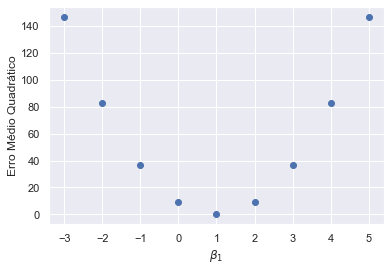

In [16]:
plt.scatter(coef_eqm[:, 0], coef_eqm[:, 1])
plt.xlabel('$\\beta_1$')
plt.ylabel('Erro Médio Quadrático')

### Calculando os coeficientes $\beta_0$ e $\beta_1$ por meio das equações

$$
\beta_1 = \sum_{i=1}^N \frac{(x_i - \bar{x}) \cdot (y_i - \bar{y})}{(x_i - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

In [17]:
y

array([0, 1, 2, 3, 4, 5])

In [18]:
x

array([0, 1, 2, 3, 4, 5])

In [19]:
x_mean = x.mean()
x_mean

2.5

In [20]:
y_mean = y.mean()
y_mean

2.5

In [21]:
x - x_mean

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5])

In [22]:
y - y_mean

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5])

In [23]:
numerador = sum((x - x_mean) * (y - y_mean))
numerador

17.5

In [24]:
denominador = sum((x - x_mean)**2)
denominador

17.5

In [25]:
beta1 = numerador / denominador
beta1

1.0

In [26]:
beta0 = y_mean - (beta1 * x_mean)

In [27]:
beta0

0.0

## Regressão Linear Simples: Altura $\Rightarrow$ Peso

In [28]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/28c52b9b-6c44-406b-9f67-a297e1193365.csv')

In [29]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### Conversão das unidades

In [30]:
# Transformando para centímetros e kg
df['altura'] = df['Height'] * 2.54
df['peso'] = df['Weight'] * 0.453592

In [31]:
df.head()

,Gender,Height,Weight,altura,peso
0,Male,73.847017,241.893563,187.571423,109.720985
1,Male,68.781904,162.310473,174.706036,73.622732
2,Male,74.110105,212.740856,188.239668,96.497550
3,Male,71.730978,220.042470,182.196685,99.809504
4,Male,69.881796,206.349801,177.499761,93.598619


### Visualização gráfica

<AxesSubplot:xlabel='altura', ylabel='peso'>

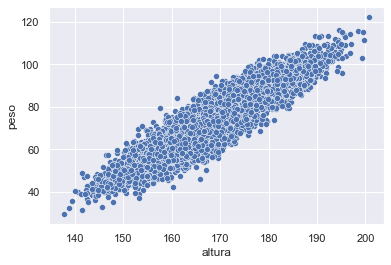

In [32]:
sns.scatterplot(data=df, x='altura', y='peso') # Estimar o peso com base na altura.

### Calculando a correlação entre as features

In [33]:
from scipy.stats import pearsonr

In [34]:
pearsonr(df['altura'], df['peso'])

(0.9247562987409145, 0.0)

- Correlação muito forte: [-1, -0.8] or [0.8, 1]

$$
\beta_1 = \sum_{i=1}^N \frac{(x_i - \bar{x}) \cdot (y_i - \bar{y})}{(x_i - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

In [35]:
x_mean = df['altura'].mean()
x_mean

168.57360177724604

In [36]:
y_mean = df['peso'].mean()
y_mean

73.22805433651767

In [37]:
x = df['altura']
y = df['peso']

In [38]:
numerador = sum((x - x_mean) * (y - y_mean))
numerador

1316085.0759109946

In [39]:
denominador = sum((x - x_mean)**2)
denominador

954965.3347672354

In [40]:
beta1 = numerador / denominador
beta1

1.3781495809287978

In [41]:
beta0 = y_mean - (beta1 * x_mean)

In [42]:
beta0 # intercepto

-159.091584308452

In [43]:
y_est = beta1 * x + beta0
y_est

0        99.409894
1        81.679466
2       100.330835
3        92.002701
4        85.529638
           ...    
9995     72.545780
9996     75.676986
9997     64.478318
9998     82.562779
9999     57.744244
Name: altura, Length: 10000, dtype: float64

In [44]:
y

0       109.720985
1        73.622732
2        96.497550
3        99.809504
4        93.598619
           ...    
9995     62.041159
9996     77.504315
9997     58.275377
9998     74.322166
9999     51.550324
Name: peso, Length: 10000, dtype: float64

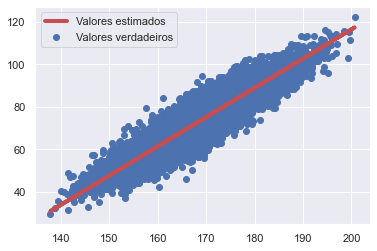

In [45]:
plt.scatter(df['altura'], df['peso'], label='Valores verdadeiros')                    # Valores verdadeiros
plt.plot(df['altura'], y_est, linewidth=4, color='r', label='Valores estimados')      # Valores estimados
plt.legend()

### Scikit Learn

In [46]:
X = df[['altura']] #Bidimensional, por isso duas aspas
y = df['peso']

In [47]:
pip install -U sklearn

Note: you may need to restart the kernel to use updated packages.


In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()

In [50]:
lr

LinearRegression()

In [51]:
lr.fit(X, y) # Treinou o modelo (calcular os coeficientes) O fit usa-se um valor de entrada e outro de saída, serve para estimar um valor de acordo com outra variável

LinearRegression()

In [52]:
lr.coef_ # Um array com os coeficientes que multiplicam o X => No nosso caso, esse é o beta1

array([1.37814958])

In [53]:
beta1

1.3781495809287978

In [54]:
lr.intercept_ # Intercepto (ou seja, o beta0)

-159.09158430845093

In [55]:
y_est = lr.coef_[0] * x + lr.intercept_

In [56]:
y_est

0        99.409894
1        81.679466
2       100.330835
3        92.002701
4        85.529638
           ...    
9995     72.545780
9996     75.676986
9997     64.478318
9998     82.562779
9999     57.744244
Name: altura, Length: 10000, dtype: float64

In [57]:
X.values

array([[187.57142322],
       [174.70603628],
       [188.2396677 ],
       ...,
       [162.22470022],
       [175.34697755],
       [157.33838453]])

In [58]:
lr.predict([[150], [180], [200]])

array([ 47.63085283,  88.97534026, 116.53833188])

In [59]:
y_pred = lr.predict(X)
y_pred

array([ 99.409894  ,  81.67946637, 100.33083484, ...,  64.47831832,
        82.56277932,  57.7442444 ])

---

### Statsmodels

In [60]:
import statsmodels.api as sm

In [61]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

C:\Users\Fabio\python_financas\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peso   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Sun, 09 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:15:55   Log-Likelihood:                -31313.
No. Observations:               10000   AIC:                         6.263e+04
Df Residuals:                    9998   BIC:                         6.265e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -159.0916      0.958   -166.109      0.000    -160.969    -157.214
altura         1.3781      0.006    242.975      0.000       1.367       1.389
==============================================================================
Omnibus:                        2.141   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                2.150
Skew:                           0.036   Prob(JB):                        0.341
Kurtosis:                       2.991   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Influência dos Outliers

### Obtendo apenas 100 amostras (como array)

In [64]:
X = df['altura'].values[:100]
y = df['peso'].values[:100]

In [67]:
X.shape

(100,)

In [68]:
y.shape

(100,)

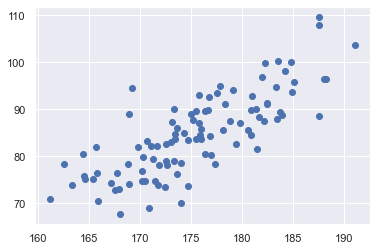

In [69]:
plt.scatter(X, y)

### Modelo sem a presença dos outliers

In [70]:
lr = LinearRegression().fit(X.reshape(-1, 1), y)

In [71]:
lr.coef_

array([1.04495271])

In [72]:
lr.intercept_

-98.52075866207376

In [73]:
y_est = lr.predict(X.reshape(-1, 1))

In [74]:
residuos = y - y_est # Valor verdadeiro - Valor estimado

In [75]:
residuos

array([ 12.23847679, -10.41605551,  -1.68324204,   7.94334299,
         6.64052067, -10.93862649,  -0.61900139,  -6.69814429,
         0.44059742,   1.03745092,  -5.80209135,   5.32445947,
         2.42695011,   0.56230009,  -0.6995153 ,  -2.92027033,
        -4.77351824,   7.13994933,  -1.95565208,   0.95364938,
        -2.76040881,   3.90538528,  -9.38700051,   2.67509001,
        -8.19507602,   4.89992669,  -1.19723156,  -0.89016356,
        -0.95171279, -13.27246275,   1.44755404,  -1.40390926,
        -2.86292813,   7.97381595,   6.45756184,  -0.83647932,
         4.7592617 ,   3.55224787,  -1.82181775,   1.83036849,
        -3.81602721,  -5.06552018,   1.76518136,  -3.77840911,
        -5.97519411,  -1.85630938,   2.21727739,   1.7942771 ,
         2.0011387 ,   0.97298052,   1.6962389 ,   3.44560591,
        -4.60414973,   2.0976939 ,  -2.29359128,  -3.90511334,
         3.15048432,  -2.18109307,  -0.59787555,   7.73223693,
        -0.84027929,   3.76451322,  -8.82465138,  -4.48

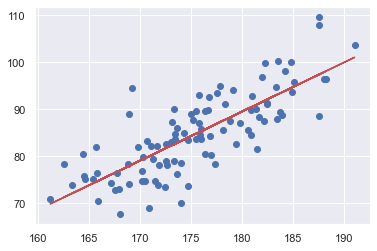

In [76]:
plt.scatter(X, y)
plt.plot(X, y_est, color='r')

### Modelo com a presença dos outliers

In [77]:
X2 = np.append(X, [150, 140, 173])
y2 = np.append(y, [200, 100, 250])

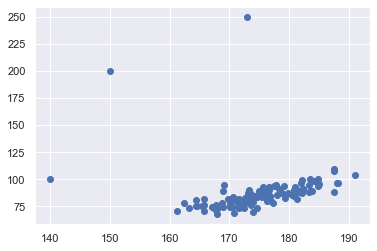

In [78]:
plt.scatter(X2, y2)

In [79]:
lr2 = LinearRegression().fit(X2.reshape(-1, 1), y2)

In [80]:
lr2.coef_

array([0.13487779])

In [81]:
lr2.intercept_

64.05035131391784

In [84]:
y_est2 = lr2.predict(X2.reshape(-1, 1))

In [85]:
y_est2

array([89.34956993, 87.614315  , 89.43970127, 88.62463715, 87.99112648,
       87.09053378, 87.61540348, 87.46584061, 87.0103452 , 85.789885  ,
       88.4411475 , 88.59374472, 86.23862088, 87.78600927, 87.77253253,
       87.22503583, 88.86011207, 85.96728876, 87.90831026, 87.32451875,
       87.31733991, 87.83957993, 86.71235472, 89.81513431, 87.309853  ,
       87.39578696, 87.7197392 , 88.99116179, 87.14816646, 87.51650955,
       87.55820106, 89.41356245, 88.55517288, 87.75075372, 87.88677592,
       88.16897605, 87.71512785, 87.0701523 , 86.59525201, 86.0802961 ,
       87.33765068, 88.78169651, 86.41129164, 86.69215749, 87.17868408,
       88.06752067, 87.43271936, 88.77596949, 87.75064975, 89.01497747,
       86.24418927, 88.09450426, 87.51480856, 87.11719246, 87.00075078,
       86.83240425, 87.46739635, 88.29694359, 88.44818477, 88.03620082,
       88.51233759, 87.8781436 , 89.33981214, 87.00278531, 88.51757362,
       86.41435942, 87.44037797, 88.97900892, 87.38048931, 87.65

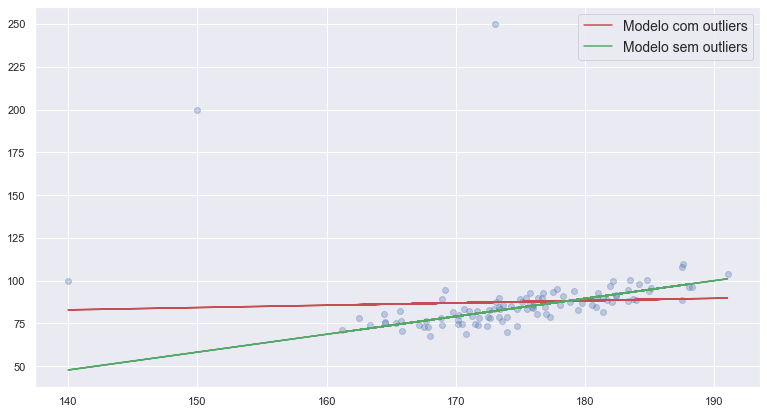

In [83]:
plt.figure(figsize=(13, 7))

plt.scatter(X2, y2, alpha=0.3)
plt.plot(X2, y_est2, color='r', label='Modelo com outliers')
plt.plot(X2, lr.predict(X2.reshape(-1, 1)), color='g', label='Modelo sem outliers')
plt.legend(fontsize=14)

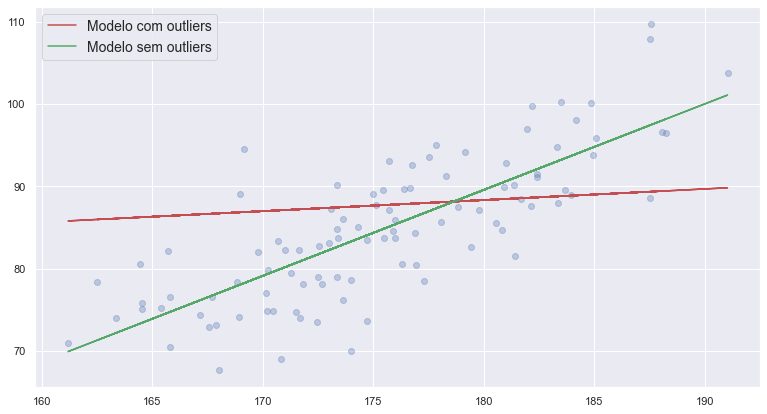

In [87]:
plt.figure(figsize=(13, 7))

plt.scatter(X, y, alpha=0.3)
plt.plot(X, lr2.predict(X.reshape(-1, 1)), color='r', label='Modelo com outliers')
plt.plot(X, y_est, color='g', label='Modelo sem outliers')
plt.legend(fontsize=14)

## Características dos Resíduos

#### 1. Não devem ser correlacionados

#### Sem outliers

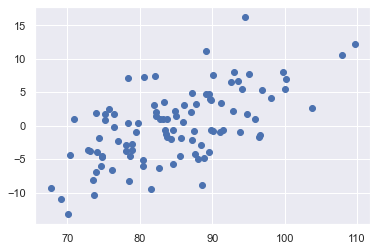

In [88]:
plt.scatter(y, y - y_est)

#### Com outliers

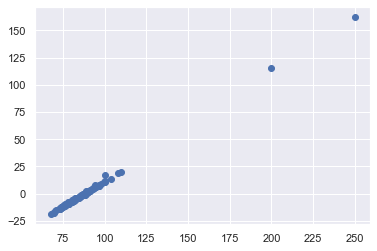

In [89]:
plt.scatter(y2, y2 - y_est2)

### 2. Ter média zero

#### Sem outliers

In [90]:
residuos = y - y_est
residuos2 = y2 - y_est2

In [91]:
residuos.mean()

3.467448550509289e-14

#### Com outliers

In [92]:
residuos2.mean()

1.4072885251947615e-14

### 4. Distribuição normal dos resíduos

#### Sem outliers

<AxesSubplot:ylabel='Count'>

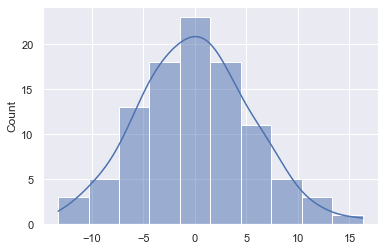

In [93]:
sns.histplot(residuos, kde=True)

In [94]:
from scipy.stats import normaltest

In [95]:
normaltest(residuos)

NormaltestResult(statistic=0.9490854261141337, pvalue=0.6221695014128703)

#### Com outliers

<AxesSubplot:ylabel='Count'>

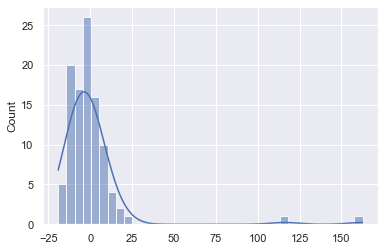

In [96]:
sns.histplot(residuos2, kde=True)

In [97]:
normaltest(residuos2)

NormaltestResult(statistic=156.8646550078932, pvalue=8.655117381782701e-35)

## Métricas para Análise dos Erros

$$
SQE = \sum_{i=1}^N \epsilon_i^2 = \frac{1}{N} \sum_{i=1}^N \left[y_i - \hat{y}_i\right]^2 = \frac{1}{N} \sum_{i=1}^N \left[y_i - (\beta_0 + \beta_1x_i)\right]^2
$$

$$
SQT = \sum_{i=1}^N \left(\hat{y}_i - \overline{y}\right)^2
$$

$$
SQExp = \sum_{i=1}^N \left(y_i - \overline{y}\right)^2
$$

### 1. R-Quadrado ($R^2$)

$$
R^2 = 1 - \frac{SQE}{SQT} = \frac{SQT - SQExp}{SQT} = \frac{SQExp}{SQT}
$$

In [244]:
# Valores estimados, utilizando o modelo treinado com os outliers, para os dados com outliers
y2_est = lr2.predict(X2.reshape(-1, 1))

In [230]:
from sklearn.metrics import r2_score

In [231]:
y.shape

(100,)

In [232]:
y_est.shape

(100,)

In [233]:
r2_score(y, y_est)

0.6214261131940761

In [234]:
y2.shape

(103,)

In [235]:
r2_score(y2, lr2.predict(X2.reshape(-1, 1)))

0.00236489972361853

In [236]:
lr.score(X.reshape(-1, 1), y) # r2_score

0.6214261131940761

In [239]:
lr2.score(X2.reshape(-1, 1), y2)

0.00236489972361853

### 2. MAE

In [240]:
from sklearn.metrics import mean_absolute_error

In [241]:
mean_absolute_error(y, y_est)

4.260493303495109

In [245]:
mean_absolute_error(y2, y2_est)

9.640274384813585

### 3. MSE

In [247]:
from sklearn.metrics import mean_squared_error as MSE

In [248]:
MSE(y, y_est)

28.728718184843036

In [249]:
MSE(y2, y2_est)

460.66295293941755

### 4. RMSE

In [250]:
np.sqrt(MSE(y, y_est))

5.359917740492202

In [251]:
np.sqrt(MSE(y2, y2_est))

21.4630601951217

### 5. RMSLE

In [252]:
from sklearn.metrics import mean_squared_log_error

In [253]:
mean_squared_log_error(y, y_est)

0.003965422358995947

In [254]:
mean_squared_log_error(y2, y2_est)

0.027940307257655395

### No Sklearn...